In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
d1 = pd.read_csv("../results/results_combined_1.csv", index_col=0)
d2 = pd.read_csv("../results/results_combined_2.csv", index_col=0)
d4 = pd.read_csv("../results/results_combined_4.csv", index_col=0)

In [3]:
d1 = d1[d1["dataset"] != "Traf"]
d1 = d1[d1["dataset"] != "Traffic"]
d1 = d1[d1["dataset"] != "ImageNet64"]

d2 = d2[d2["dataset"] != "Traf"]
d2 = d2[d2["dataset"] != "Traffic"]
d2 = d2[d2["dataset"] != "ImageNet64"]

d4 = d4[d4["dataset"] != "Traf"]
d4 = d4[d4["dataset"] != "Traffic"]
d4 = d4[d4["dataset"] != "ImageNet64"]


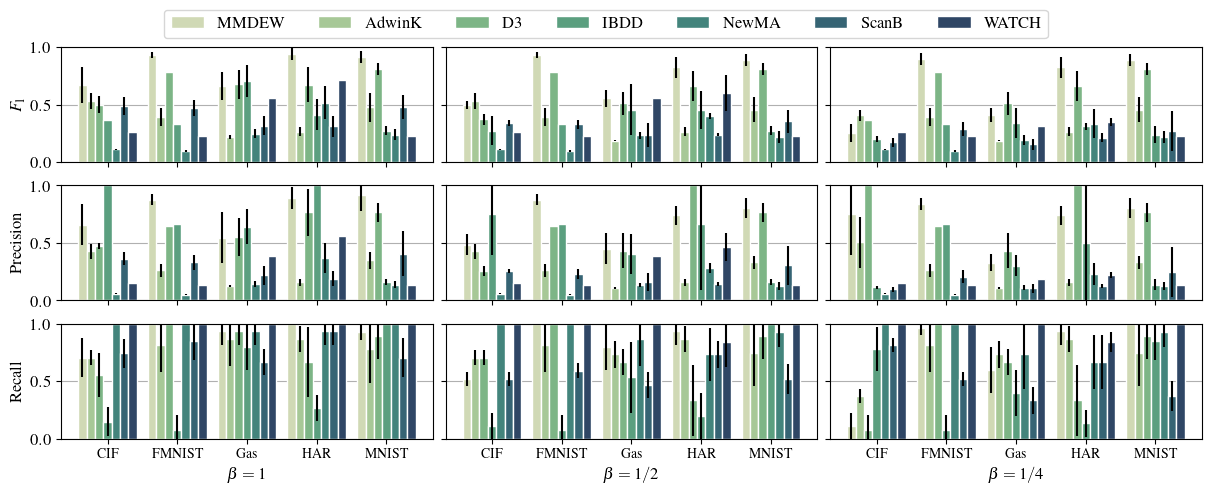

In [4]:
fig, ((ax11,ax12, ax13), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3,3,figsize=(12,4.5),sharex=True,sharey=True,layout="constrained")

def p(data,y,ax):
    bar_width = .12 #.18
    group_idx = np.arange(5) # number of datasets
    algorithms = ["MMDEW", "AdwinK", "D3", "IBDD", "NewMA", "ScanB", "WATCH"]
    cs = sns.cubehelix_palette(9, start=0.5, rot=-.75, gamma=1.2)
    ax.grid(visible=None, axis="y")
    for i, a in enumerate(algorithms):
        x_vals = group_idx + i * bar_width
        y_vals =  data[data.algorithm == a].groupby("dataset")[y].mean()
        err = data[data.algorithm == a].groupby("dataset")[y].std()
        ax.bar(x_vals, y_vals, width = bar_width, edgecolor ='white', label = a, color = cs[i])
        ax.errorbar(x_vals, y_vals, yerr = err, fmt="none", ecolor="black")


        ax.set_ylim((0,1))
        ax.set_xticks([r + bar_width * 3 for r in group_idx], data.dataset.unique())
        ax.set_axisbelow(True)
        
p(data=d1, y="f1_detected_cps_at_y", ax=ax11)
p(data=d1, y="precision_y", ax=ax21)
p(data=d1, y="recall_y", ax=ax31)

p(data=d2, y="f1_detected_cps_at_y", ax=ax12)
p(data=d2, y="precision_y", ax=ax22)
p(data=d2, y="recall_y", ax=ax32)

p(data=d4, y="f1_detected_cps_at_y", ax=ax13)
p(data=d4, y="precision_y", ax=ax23)
p(data=d4, y="recall_y", ax=ax33)

ax11.set_ylabel("$F_1$", fontsize=12)
ax21.set_ylabel("Precision", fontsize=12)
ax31.set_ylabel("Recall", fontsize=12)
ax31.set_xlabel("$\\beta = 1$", fontsize=12)
ax32.set_xlabel("$\\beta = 1/2$", fontsize=12)
ax33.set_xlabel("$\\beta = 1/4$", fontsize=12)

Line, Label = ax11.get_legend_handles_labels()
fig.legend(Line, Label, loc="upper center", bbox_to_anchor=(0.5, 1.08), ncol=7)
#plt.tight_layout()
#plt.savefig("../../mmdew-article/fig/results_0pad.pdf", bbox_inches='tight')
plt.show()